<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Jhee/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Clone git for data
!git clone https://github.com/ManuelBagasina/DATCapstone.git

Cloning into 'DATCapstone'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 268 (delta 71), reused 8 (delta 2), pack-reused 126 (from 1)
Receiving objects: 100% (268/268), 25.17 MiB | 6.83 MiB/s, done.
Resolving deltas: 100% (146/146), done.
Updating files: 100% (20/20), done.


In [2]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

# Preprocessing

In [3]:
import pandas as pd

# File paths
files = {
    "stock": "/content/DATCapstone/data/AAPL_stock.csv",
    "micro": "/content/DATCapstone/data/AAPL_micro.csv",
    "macro": "/content/DATCapstone/data/AAPL_macro.csv",
    "articles": "/content/DATCapstone/data/AAPL_articles.csv",
    "reddit": "/content/DATCapstone/data/AAPL_reddit.csv"
}

# Load the data into dataframes
dfs = {name: pd.read_csv(path) for name, path in files.items()}

# Convert date columns to datetime format
dfs["stock"]["Date"] = pd.to_datetime(dfs["stock"]["Unnamed: 0"])
dfs["micro"]["Date"] = pd.to_datetime(dfs["micro"]["Unnamed: 0"])
dfs["macro"]["Date"] = pd.to_datetime(dfs["macro"]["Unnamed: 0"])
dfs["articles"]["Date"] = pd.to_datetime(dfs["articles"]["time"], errors='coerce', utc=True).dt.tz_convert(None).dt.date
dfs["reddit"]["Date"] = pd.to_datetime(dfs["reddit"]["Unnamed: 0"])

# Drop unnecessary columns
dfs = {key: df.drop(columns=["Unnamed: 0", "time"], errors="ignore") for key, df in dfs.items()}

### Macroeconomic Data

In [4]:
dfs['macro'].sort_values('Date', inplace = True)
dfs["macro"].ffill(inplace=True)
dfs["macro"].dropna(inplace=True)
# Resample macroeconomic data to daily frequency using forward fill
dfs["macro"] = dfs["macro"].set_index("Date").resample("D").ffill().reset_index()
dfs["macro"]

,Date,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
0,1992-01-01,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
1,1992-01-02,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
2,1992-01-03,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
3,1992-01-04,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
4,1992-01-05,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
...,...,...,...,...,...,...,...,...,...,...,...
12050,2024-12-28,29700.580,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,19363.4,74.0
12051,2024-12-29,29700.580,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,19363.4,74.0
12052,2024-12-30,29700.580,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,19363.4,74.0
12053,2024-12-31,29700.580,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,19363.4,74.0


### Microeconomic Data

In [5]:
dfs['micro'].sort_values('Date', inplace = True)
dfs["micro"].ffill(inplace=True)
dfs['micro'].reset_index(drop = True, inplace = True)
dfs['micro'].drop(0, axis = 0, inplace = True)
# Resample macroeconomic data to daily frequency using forward fill
dfs["micro"] = dfs["micro"].set_index("Date").resample("D").ffill().reset_index()

# Expand Dataframe ~ 2024-12-31
last_date = dfs["micro"]["Date"].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), end="2024-12-31", freq="D")
future_df = pd.DataFrame({"Date": future_dates})

# Original dataframe + Expanded dataframe
dfs["micro"] = pd.concat([dfs["micro"], future_df], ignore_index=True)

# Forward Fill
dfs["micro"].ffill(inplace=True)

dfs["micro"]

,Date,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
0,2021-09-30,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
1,2021-10-01,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
2,2021-10-02,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
3,2021-10-03,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
4,2021-10-04,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,2024-12-27,0.0,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,-183000000.0,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
1185,2024-12-28,0.0,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,-183000000.0,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
1186,2024-12-29,0.0,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,-183000000.0,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
1187,2024-12-30,0.0,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,-183000000.0,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10


### Merge: Stock + Macro + Micro

In [6]:
#Merging
merged_df = dfs['stock'].merge(dfs['macro'], on='Date', how='inner')
merged_df = merged_df.merge(dfs['micro'], on = 'Date', how = 'inner')
merged_df.set_index('Date', inplace = True)
merged_df.reset_index(inplace = True)

# Date Filtering
start_date = "2021-09-30"
end_date = "2024-12-31"

SMM_df = merged_df[(merged_df["Date"] >= start_date) & (merged_df["Date"] <= end_date)]

SMM_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
0,2021-09-30,140.983639,141.690227,138.647974,138.863876,89056700,0.0,0.0,23921.991,4.7,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
1,2021-10-01,139.256465,140.257467,136.518448,139.992493,94639600,0.0,0.0,24777.038,4.5,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
2,2021-10-04,139.119068,139.560697,135.694095,136.547882,98322000,0.0,0.0,24777.038,4.5,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,2024-12-24,255.209412,257.926411,255.009620,257.916443,23234700,0.0,0.0,29700.580,4.1,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
814,2024-12-26,257.906429,259.814335,257.347047,258.735504,27237100,0.0,0.0,29700.580,4.1,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
815,2024-12-27,257.546826,258.415896,252.782075,255.309296,42355300,0.0,0.0,29700.580,4.1,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
816,2024-12-30,251.952985,253.221595,250.474615,251.923019,35557500,0.0,0.0,29700.580,4.1,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10


### Articles

In [7]:
#Articles sentiment ont hot encoding
dfs['articles'] = dfs['articles'][['Date', 'sentiment']]
dfs['articles'] = pd.get_dummies(dfs['articles'], columns = ['sentiment'])
dfs['articles'] = dfs['articles'].groupby('Date').sum()
dfs['articles'].rename(columns=lambda x: f"articles_{x}", inplace=True)
dfs['articles'].reset_index(inplace = True)
dfs['articles']['Date'] = pd.to_datetime(dfs['articles']['Date'])
dfs['articles'].head()

,Date,articles_sentiment_Negative,articles_sentiment_Neutral,articles_sentiment_Positive
0,2020-03-18,3,9,12
1,2020-03-19,2,6,5
2,2020-03-20,4,12,5
3,2020-03-21,0,1,2
4,2020-03-22,1,3,3


##### Merge: Articles

In [8]:
#Merging
merged_df = merged_df.merge(dfs['articles'], on = 'Date', how = 'left')
merged_df.set_index('Date', inplace = True)
merged_df.reset_index(inplace = True)
merged_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations,articles_sentiment_Negative,articles_sentiment_Neutral,articles_sentiment_Positive
0,2021-09-30,140.983639,141.690227,138.647974,138.863876,89056700,0.0,0.0,23921.991,4.7,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,1,2,1
1,2021-10-01,139.256465,140.257467,136.518448,139.992493,94639600,0.0,0.0,24777.038,4.5,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,2,4,4
2,2021-10-04,139.119068,139.560697,135.694095,136.547882,98322000,0.0,0.0,24777.038,4.5,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,4,0,8
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,2,1,3
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,5,1,2


### Reddit

In [9]:
from transformers import pipeline

# Load FinBERT sentiment analysis model
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [10]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import torch

# Load FinBERT model and tokenizer
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load dataset
df = dfs["reddit"].copy()

# Define function for sentiment analysis with truncation
def batch_sentiment_analysis(texts):
    # Ensure texts are strings & replace NaN with "Neutral"
    texts = [str(t) if pd.notna(t) else "Neutral" for t in texts]

    # Tokenization with truncation
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors="pt")
    inputs = {key: val.to(device) for key, val in inputs.items()}  # Move to GPU if available

    # Run inference
    model.to(device)
    with torch.no_grad():
        outputs = model(**inputs)

    # Convert logits to predicted class
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    labels = ["negative", "neutral", "positive"]
    results = [labels[pred.argmax().item()] for pred in predictions]

    return results

# Apply batch processing for sentiment analysis
batch_size = 32  # Adjust based on GPU memory
for col in ["Title", "Comment1", "Comment2", "Comment3"]:
    text_list = df[col].fillna("Neutral").tolist()  # Replace NaN with "Neutral"
    sentiment_results = []

    # Process in batches
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i+batch_size]
        sentiment_results.extend(batch_sentiment_analysis(batch))

    # Assign results back to the DataFrame
    df[f"{col}_Sentiment"] = sentiment_results

df.head()

,Title,Score,Comment1,Comment1_Score,Comment2,Comment2_Score,Comment3,Comment3_Score,Date,Title_Sentiment,Comment1_Sentiment,Comment2_Sentiment,Comment3_Sentiment
0,"Apple, facing tariffs on Chinese imports, says...",1431,coincidentally the construction isn’t supposed...,2413.0,Isn't that basically what they claimed last ti...,295.0,The best part of the article is that part of t...,41.0,2025-02-24,positive,neutral,positive,positive
1,Apple pulls data protection tool after UK gove...,14,Idk how to feel about the EU. Sometimes they f...,2.0,NaN,NaN,NaN,NaN,2025-02-22,neutral,positive,positive,positive
2,Apple Warns UK iPhone Owners It Will Remove En...,174,This seems like a massive shoot in the foot fo...,88.0,Encryption was one of the selling point of Apple.,39.0,UK government really hates personal rights an...,41.0,2025-02-21,neutral,neutral,positive,neutral
3,Apple removing end-to-end cloud encryption fea...,1182,"Great work UK government, now your citizens ar...",577.0,> Britain had ordered Apple to give it unprece...,411.0,Make sure to email your MP about this. You can...,48.0,2025-02-21,positive,positive,positive,positive
4,Apple Warns UK iPhone Owners It Will Remove En...,175,This seems like a massive shoot in the foot fo...,89.0,Encryption was one of the selling point of Apple.,41.0,UK government really hates personal rights an...,41.0,2025-02-21,neutral,neutral,positive,neutral


In [11]:
# Apply One-Hot Encoding
for col in ["Title_Sentiment", "Comment1_Sentiment", "Comment2_Sentiment", "Comment3_Sentiment"]:
    df = pd.get_dummies(df, columns=[col], prefix=col)

# Formatting
df.drop(columns=["Title", "Comment1", "Comment2", "Comment3"], inplace=True)
df.sort_values('Date', inplace = True)
df.set_index('Date', inplace = True)
df.reset_index(inplace = True)

#Sum by date
df = df.groupby("Date").sum()

# Formatting
df = df.rename(columns=lambda x: f"reddit_{x}")

dfs['reddit'] = df.copy()
dfs['reddit'].head()

,reddit_Score,reddit_Comment1_Score,reddit_Comment2_Score,reddit_Comment3_Score,reddit_Title_Sentiment_negative,reddit_Title_Sentiment_neutral,reddit_Title_Sentiment_positive,reddit_Comment1_Sentiment_negative,reddit_Comment1_Sentiment_neutral,reddit_Comment1_Sentiment_positive,reddit_Comment2_Sentiment_negative,reddit_Comment2_Sentiment_neutral,reddit_Comment2_Sentiment_positive,reddit_Comment3_Sentiment_negative,reddit_Comment3_Sentiment_neutral,reddit_Comment3_Sentiment_positive
Date,,,,,,,,,,,,,,,,
2008-07-10,0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,1
2008-12-22,0,2.0,1.0,1.0,0,1,0,0,0,1,0,0,1,0,1,0
2009-01-19,2,0.0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,1
2009-09-03,0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,1,0,0,1
2009-11-08,0,1.0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,1


##### Merge: Reddit

In [12]:
#Merging
merged_df = merged_df.merge(dfs['reddit'], on = 'Date', how = 'left')
merged_df.set_index('Date', inplace = True)
merged_df.reset_index(inplace = True)
df = merged_df.copy()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,reddit_Title_Sentiment_positive,reddit_Comment1_Sentiment_negative,reddit_Comment1_Sentiment_neutral,reddit_Comment1_Sentiment_positive,reddit_Comment2_Sentiment_negative,reddit_Comment2_Sentiment_neutral,reddit_Comment2_Sentiment_positive,reddit_Comment3_Sentiment_negative,reddit_Comment3_Sentiment_neutral,reddit_Comment3_Sentiment_positive
0,2021-09-30,140.983639,141.690227,138.647974,138.863876,89056700,0.0,0.0,23921.991,4.7,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0
1,2021-10-01,139.256465,140.257467,136.518448,139.992493,94639600,0.0,0.0,24777.038,4.5,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2021-10-04,139.119068,139.560697,135.694095,136.547882,98322000,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Check Columns
for x in df.columns:
  print(x)

Date
Open
High
Low
Close
Volume
Dividends
Stock Splits
GDP (Billions USD)
Unemployment Rate (%)
Producer Price Index (PPI)
Retail Sales (Millions USD)
Industrial Production Index
Housing Starts (Thousands)
Personal Consumption Expenditures (PCE)
Trade Balance (Billions USD)
M2 Money Supply (Billions USD)
Consumer Confidence Index
Tax Effect Of Unusual Items
Tax Rate For Calcs
Normalized EBITDA
Net Income From Continuing Operation Net Minority Interest
Reconciled Depreciation
Reconciled Cost Of Revenue
EBITDA
EBIT
Net Interest Income
Interest Expense
Interest Income
Normalized Income
Net Income From Continuing And Discontinued Operation
Total Expenses
Total Operating Income As Reported
Diluted Average Shares
Basic Average Shares
Diluted EPS
Basic EPS
Diluted NI Availto Com Stockholders
Net Income Common Stockholders
Net Income
Net Income Including Noncontrolling Interests
Net Income Continuous Operations
Tax Provision
Pretax Income
Other Income Expense
Other Non Operating Income Expense

#EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,reddit_Title_Sentiment_positive,reddit_Comment1_Sentiment_negative,reddit_Comment1_Sentiment_neutral,reddit_Comment1_Sentiment_positive,reddit_Comment2_Sentiment_negative,reddit_Comment2_Sentiment_neutral,reddit_Comment2_Sentiment_positive,reddit_Comment3_Sentiment_negative,reddit_Comment3_Sentiment_neutral,reddit_Comment3_Sentiment_positive
count,818,818.000000,818.000000,818.000000,818.000000,8.180000e+02,818.000000,818.0,818.000000,818.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,2023-05-16 19:13:03.374083328,174.846700,176.720398,173.184375,175.062167,6.975032e+07,0.003753,0.0,27413.928471,3.804645,...,0.538071,0.065990,0.289340,1.253807,0.055838,0.289340,1.263959,0.050761,0.213198,1.345178
min,2021-09-30 00:00:00,124.561732,126.301485,122.742865,123.583092,2.323470e+07,0.000000,0.0,23921.991000,3.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-07-25 06:00:00,151.434685,153.418136,149.587550,151.935707,4.970338e+07,0.000000,0.0,26272.011000,3.600000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,2023-05-16 12:00:00,170.570375,172.329590,169.193939,170.999664,6.386875e+07,0.000000,0.0,27453.815000,3.700000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,2024-03-10 06:00:00,188.949958,190.364406,188.074596,189.174202,8.248288e+07,0.000000,0.0,28624.069000,4.000000,...,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
max,2024-12-31 00:00:00,257.906429,259.814335,257.347047,258.735504,3.186799e+08,0.250000,0.0,29700.580000,4.700000,...,5.000000,2.000000,3.000000,5.000000,2.000000,2.000000,6.000000,2.000000,2.000000,5.000000
std,NaN,29.186568,29.193012,29.169728,29.232978,2.933000e+07,0.029578,0.0,1538.599603,0.264187,...,0.865921,0.286981,0.608224,0.982785,0.289138,0.582516,0.985285,0.242146,0.529948,0.927274


In [16]:
# Checking missing data
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Missing values:\\n{df.isnull().sum().sort_values(ascending=False).head(10)}")

# Select only numerical columns for calculating and sorting means
numerical_df = df.select_dtypes(include=['number'])
print(f"Feature distributions:\\n{numerical_df.describe().loc['mean'].sort_values()}")


Date range: 2021-09-30 00:00:00 to 2024-12-31 00:00:00
Missing values:\nreddit_Comment3_Sentiment_positive    621
reddit_Comment1_Sentiment_negative    621
reddit_Score                          621
reddit_Comment1_Score                 621
reddit_Comment2_Score                 621
reddit_Comment3_Score                 621
reddit_Title_Sentiment_negative       621
reddit_Title_Sentiment_neutral        621
reddit_Title_Sentiment_positive       621
reddit_Comment1_Sentiment_neutral     621
dtype: int64
Feature distributions:\nFinancing Cash Flow                              -1.055915e+11
Cash Flow From Continuing Financing Activities   -1.055915e+11
Repurchase Of Capital Stock                      -8.516354e+10
Common Stock Payments                            -8.516354e+10
Net Common Stock Issuance                        -8.516354e+10
                                                      ...     
Total Expenses                                    2.669714e+11
Total Liabilities Net Minority

## Time series visualization

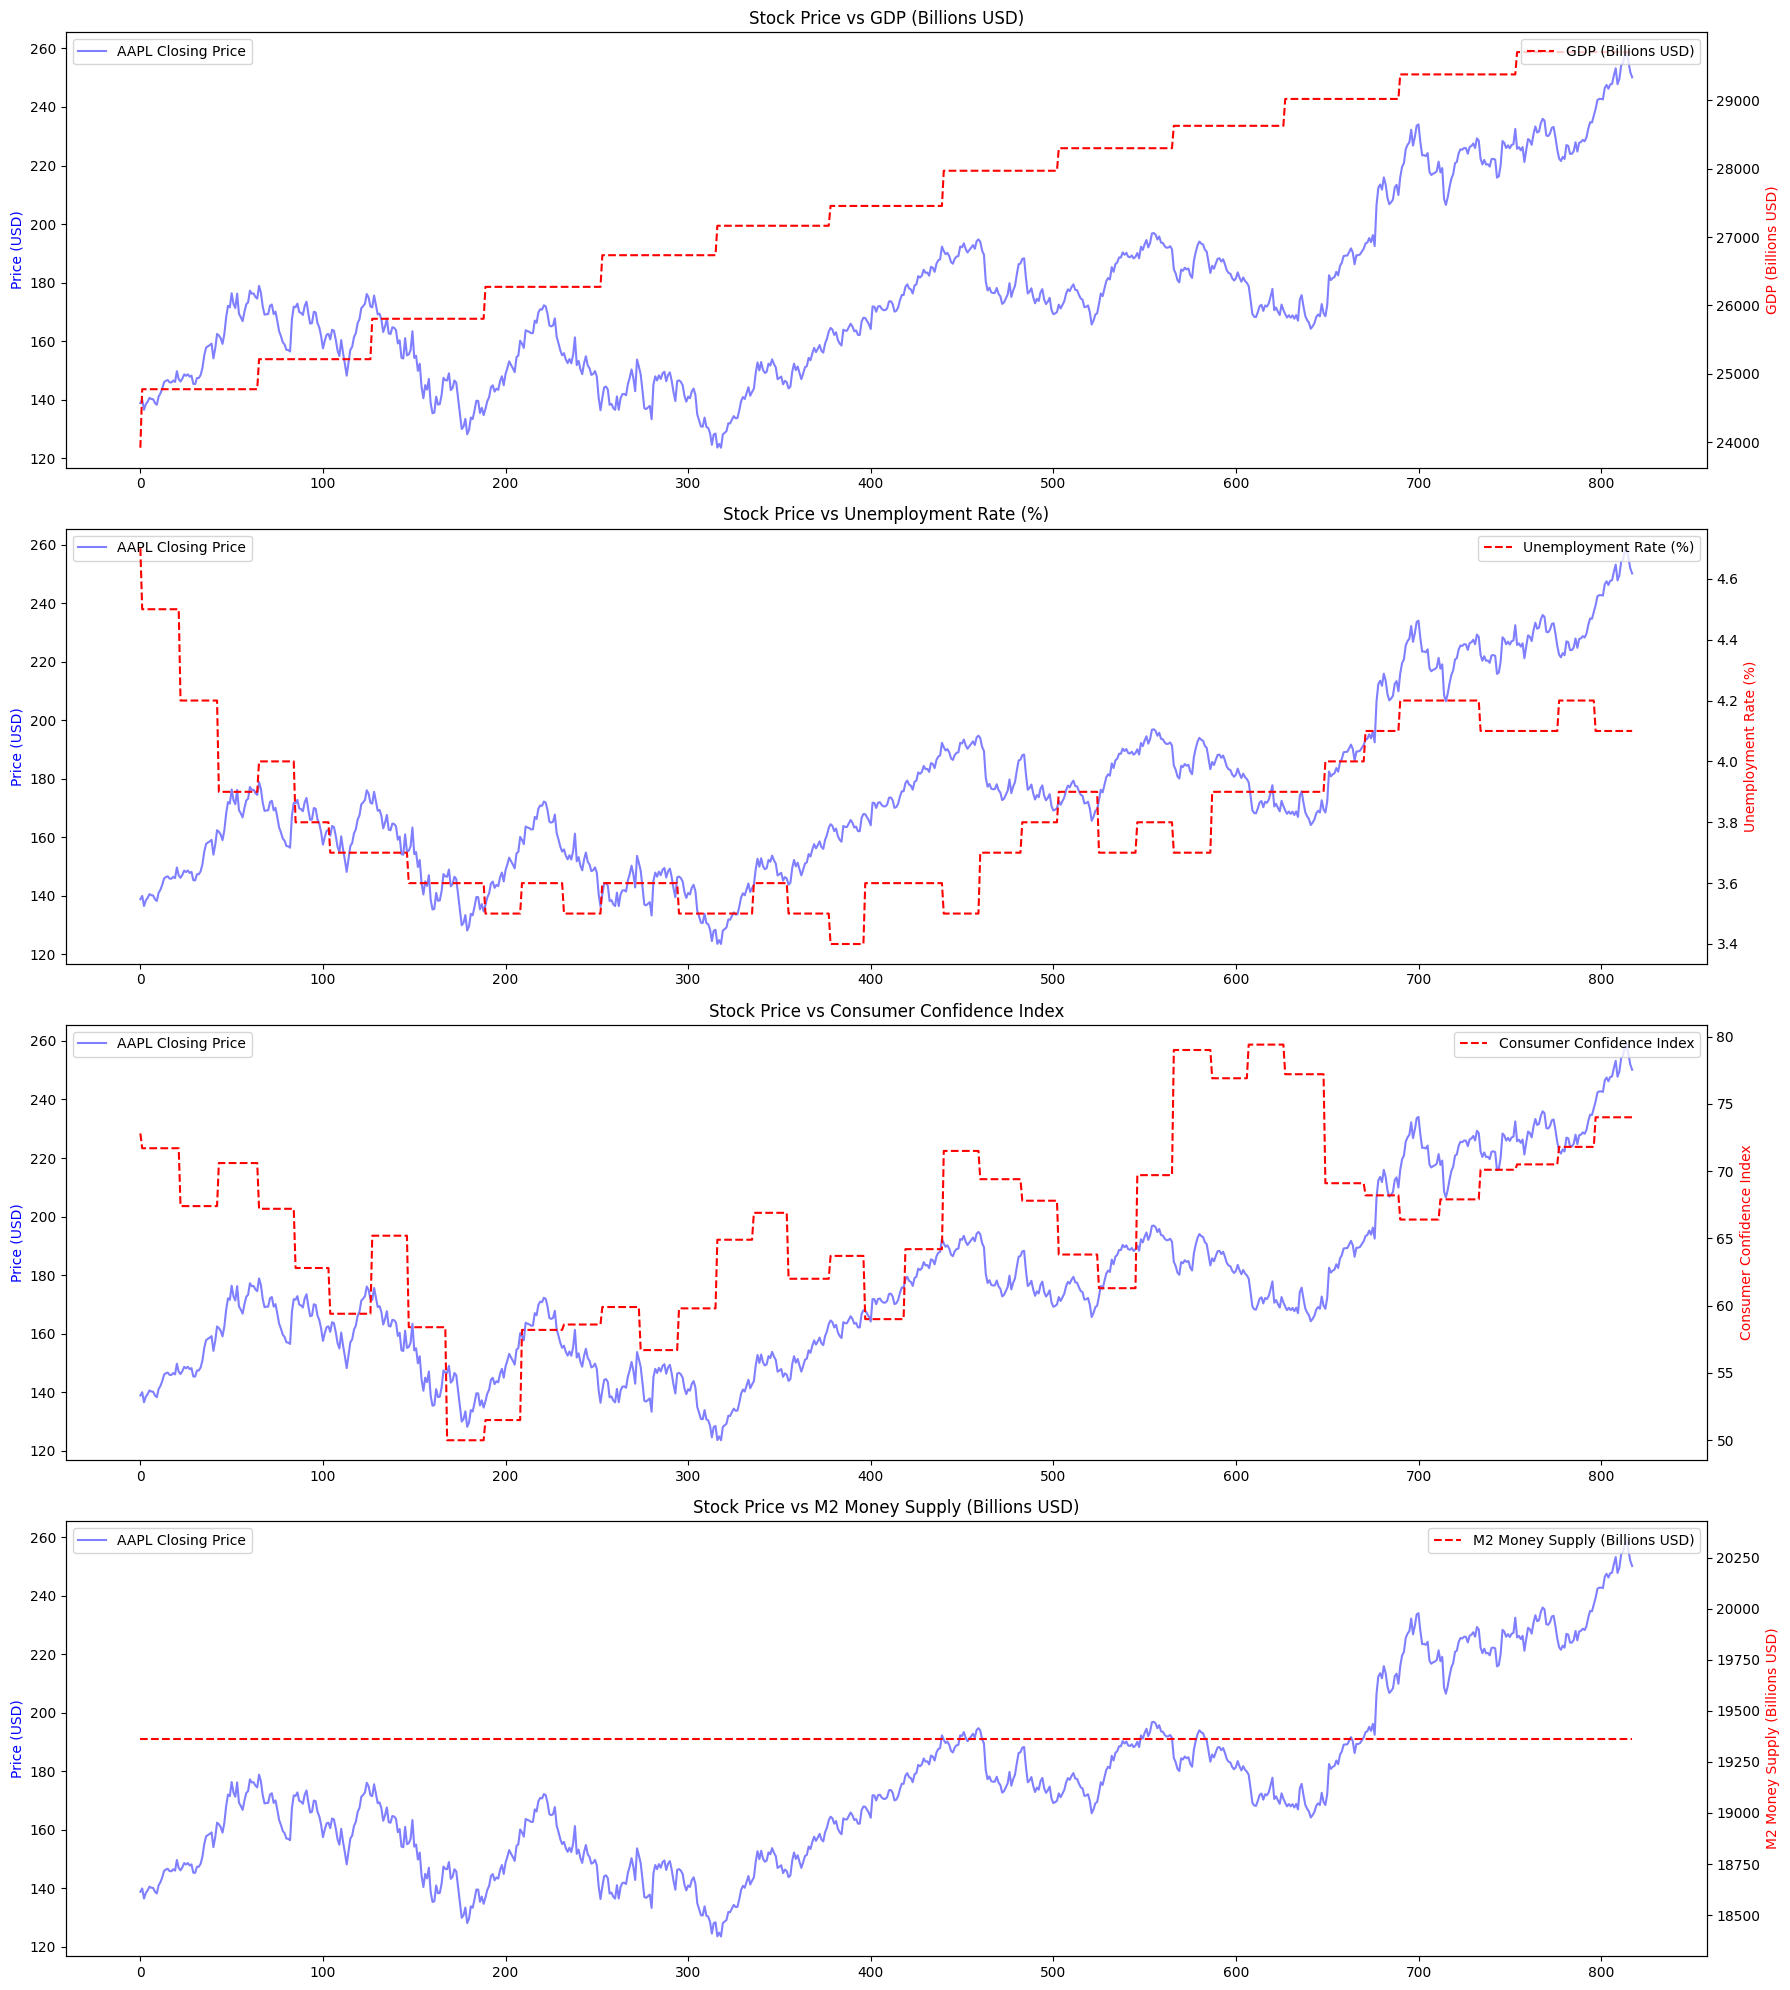

In [17]:
# Time-Series Visualization for trends in stock prices alongside macroeconomic shifts
macro_vars = ['GDP (Billions USD)', 'Unemployment Rate (%)',
             'Consumer Confidence Index', 'M2 Money Supply (Billions USD)']

fig, axes = plt.subplots(4, 1, figsize=(18, 20))
for ax, var in zip(axes, macro_vars):
    ax.plot(df['Close'], color='blue', alpha=0.5, label='AAPL Closing Price')
    ax.set_ylabel('Price (USD)', color='blue')
    ax2 = ax.twinx()
    ax2.plot(df[var], color='red', linestyle='--', label=var)
    ax2.set_ylabel(var, color='red')
    ax.set_title(f'Stock Price vs {var}')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


## Heatmaps


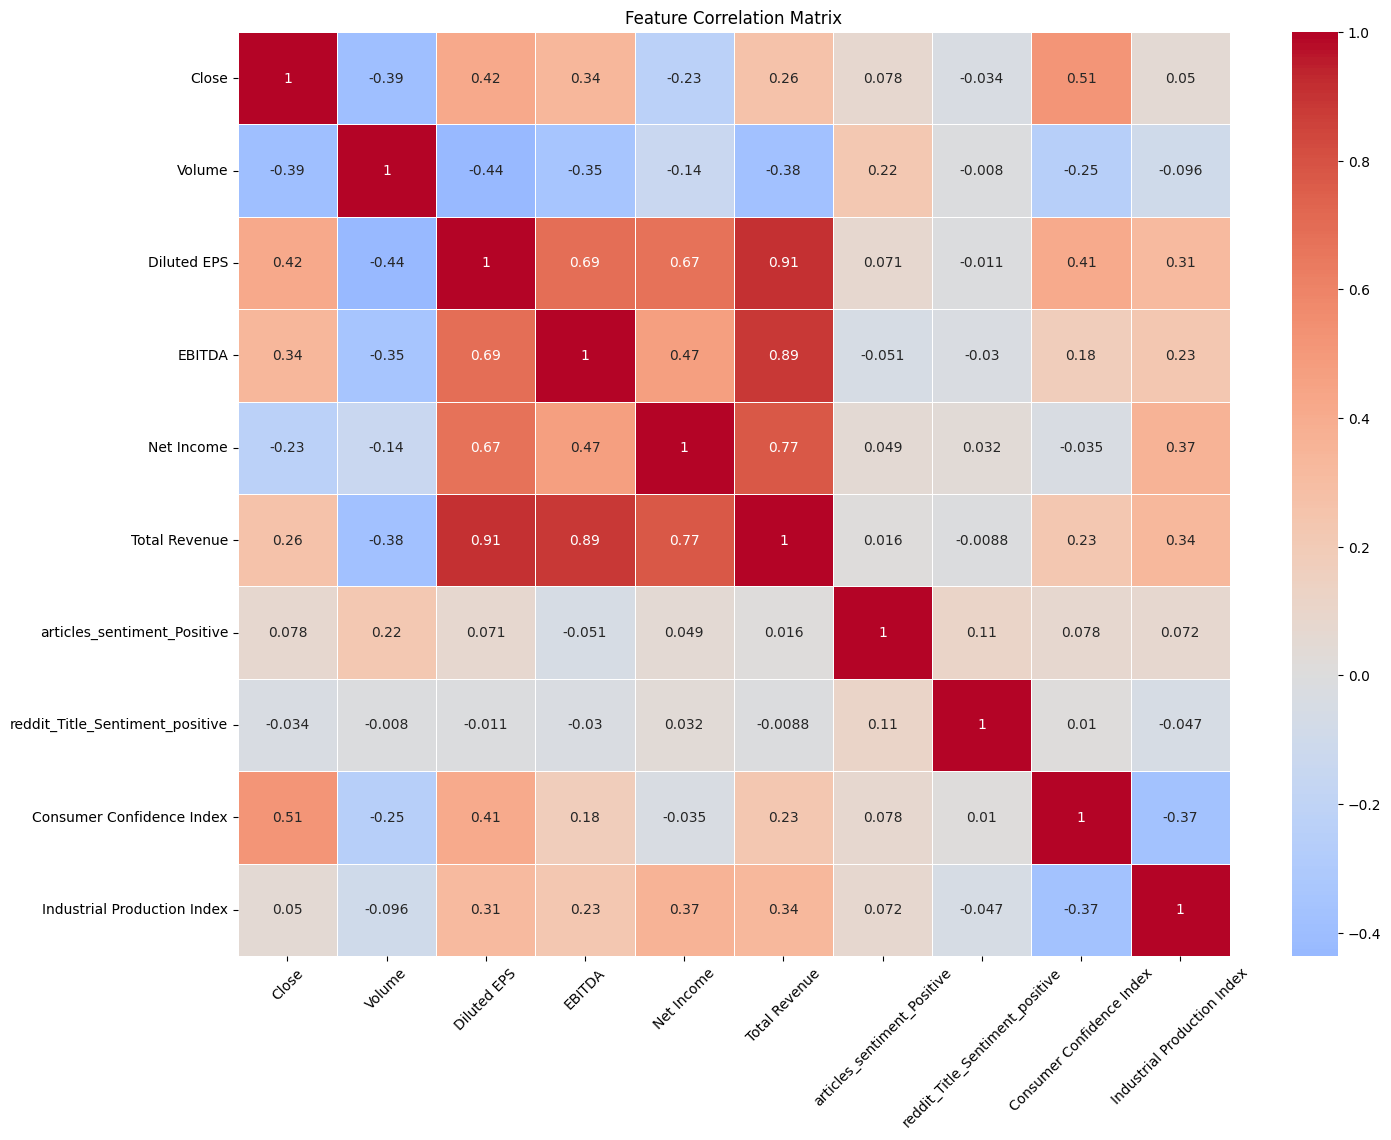

In [18]:
# All of them heatmap
corr_features = [
    'Close', 'Volume', 'Diluted EPS',
    'EBITDA', 'Net Income', 'Total Revenue',
    'articles_sentiment_Positive', 'reddit_Title_Sentiment_positive',
    'Consumer Confidence Index', 'Industrial Production Index'
]

plt.figure(figsize=(16, 12))
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm',
           center=0, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

### Note: I couldnt find roa so this is temporary

In [19]:
# TODO: LOREM TEMPORARY
# Calculate Return on Assets (ROA) = Net Income / Total Assets
df['ROA'] = df['Net Income'] / df['Total Assets']

# Calculate Current Ratio = Current Assets / Current Liabilities
df['Current_Ratio'] = df['Current Assets'] / df['Current Liabilities']

# Calculate additional useful ratios from literature review
df['Debt_to_Equity'] = df['Total Debt'] / df['Stockholders Equity']
df['Gross_Margin'] = (df['Total Revenue'] - df['Cost Of Revenue']) / df['Total Revenue']
df['Operating_Margin'] = df['Operating Income'] / df['Total Revenue']


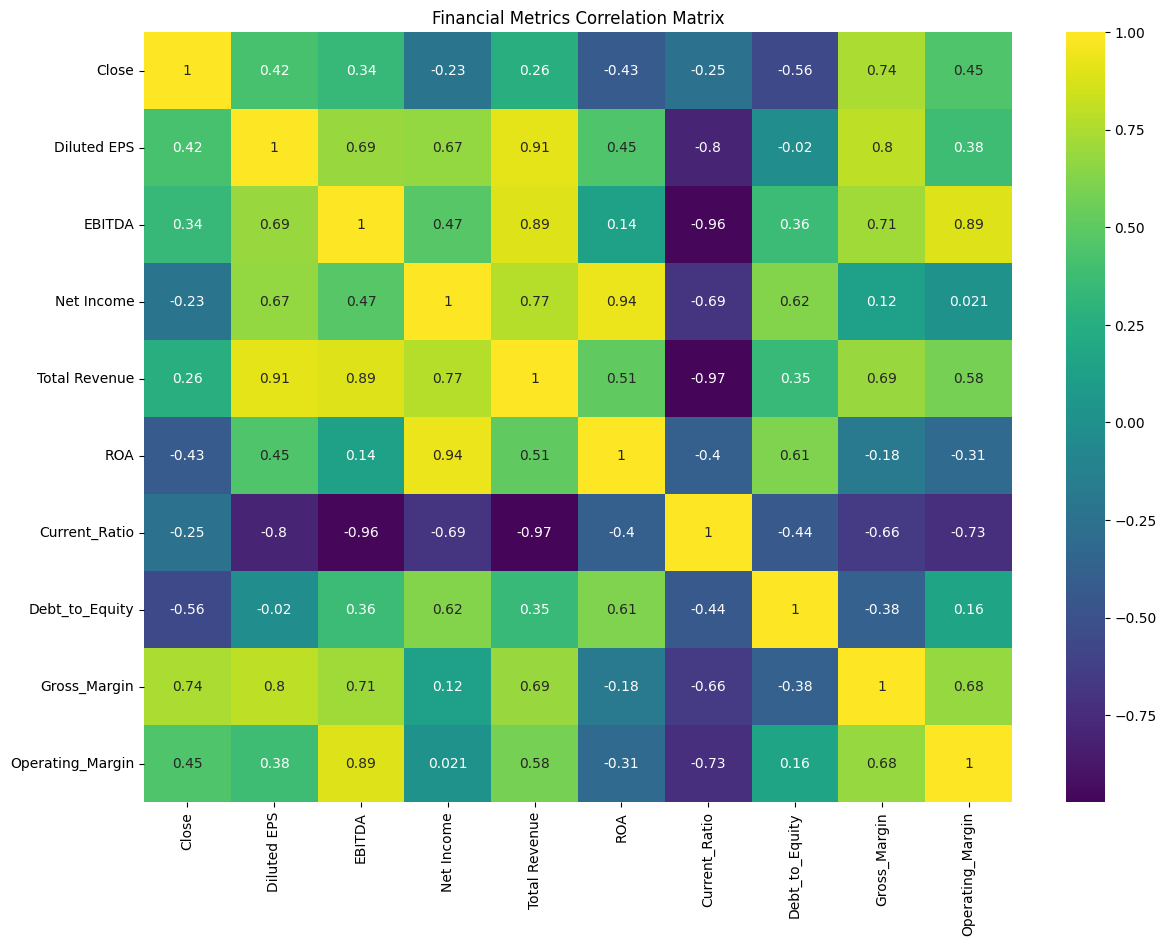

In [20]:
# 3. Microeconomic Heatmap (Lit Review 2.1.1)
micro_features = [
    'Close',
    'Diluted EPS',
    'EBITDA',
    'Net Income',
    'Total Revenue',
    'ROA',                    # Calculated as Net Income/Total Assets
    'Current_Ratio',           # Calculated as Current Assets/Current Liabilities
    'Debt_to_Equity',          # Calculated as Total Debt/Stockholders Equity
    'Gross_Margin',            # Calculated as (Total Revenue - Cost of Revenue)/Total Revenue
    'Operating_Margin'        # Calculated as Operating Income/Total Revenue
]

plt.figure(figsize=(14,10))
sns.heatmap(df[micro_features].corr(), annot=True, cmap='viridis', center=0)
plt.title("Financial Metrics Correlation Matrix")
plt.show()

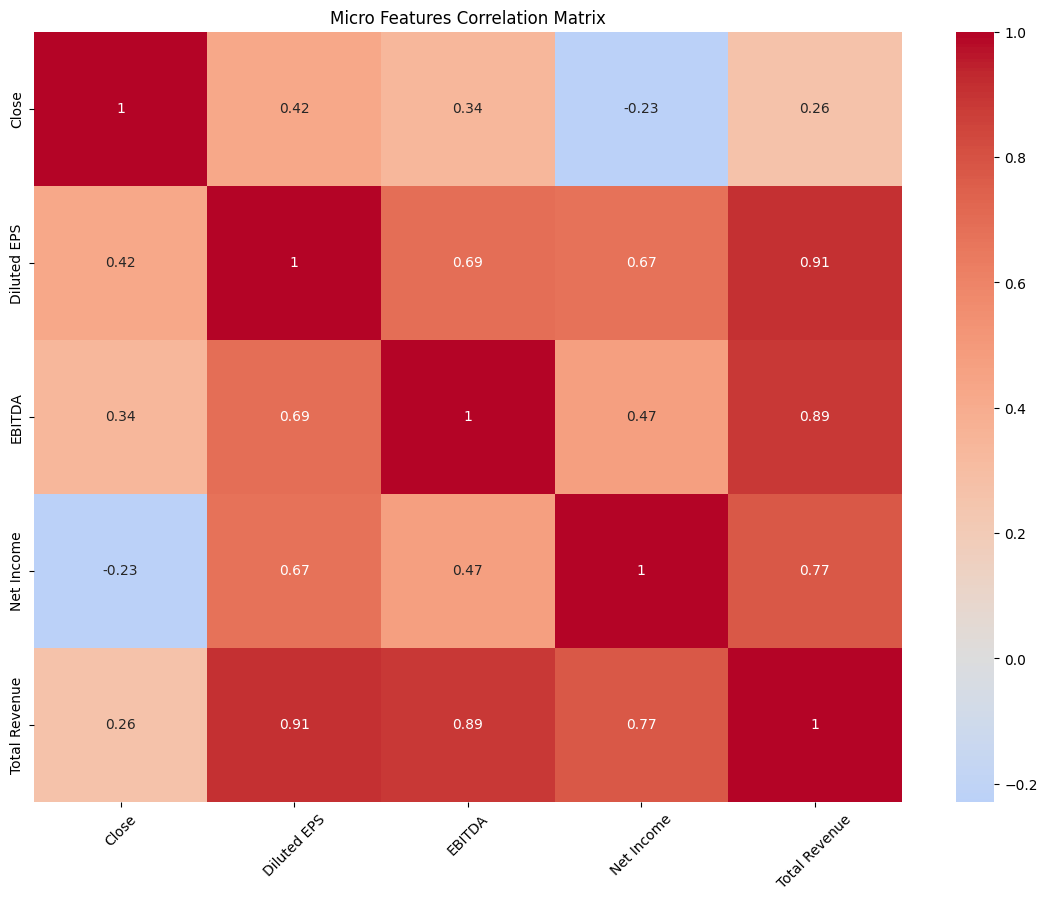

In [21]:
# Microeconomic Heatmap
micro_features = [
    'Close',  # Target variable
    'Diluted EPS',
    'EBITDA',
    'Net Income',
    'Total Revenue',
]

plt.figure(figsize=(14,10))
sns.heatmap(df[micro_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Micro Features Correlation Matrix")
plt.xticks(rotation=45)
plt.show()

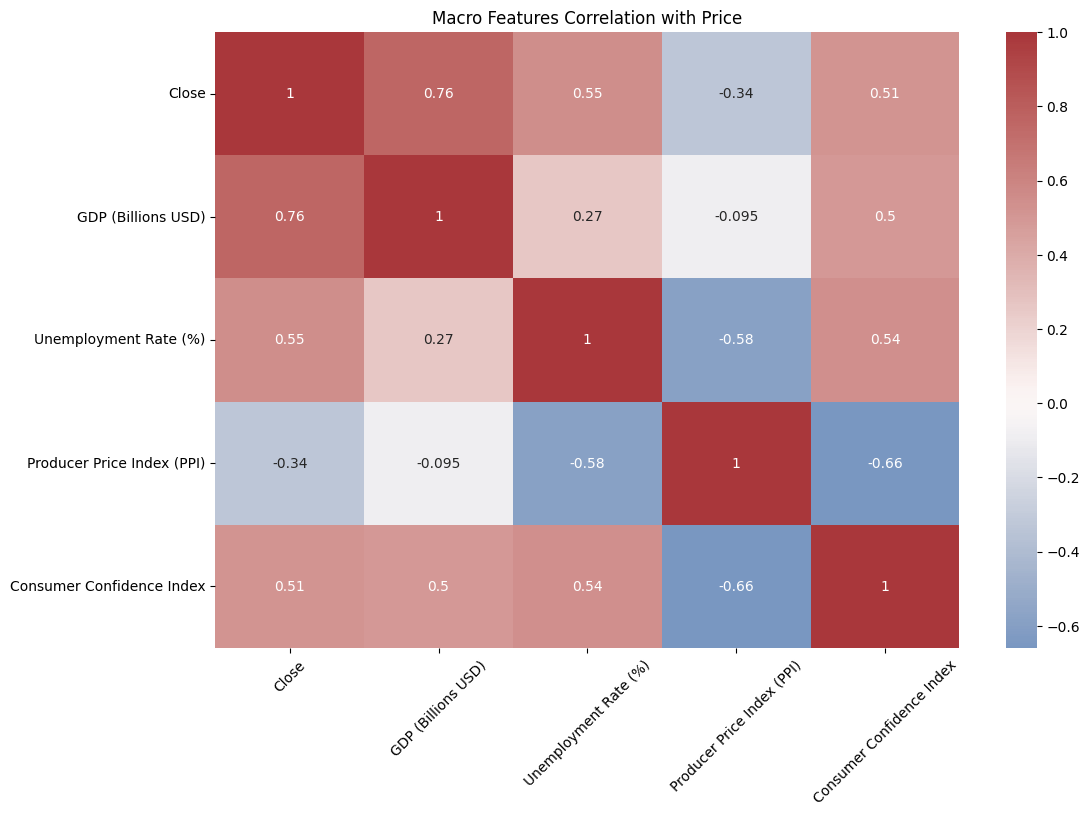

In [22]:
# Macroeconomic Heatmap
macro_features = [
    'Close',  # Target variable
    'GDP (Billions USD)',
    'Unemployment Rate (%)',
    'Producer Price Index (PPI)',
    'Consumer Confidence Index'
]

plt.figure(figsize=(12,8))
sns.heatmap(df[macro_features].corr(), annot=True, cmap='vlag', center=0)
plt.title("Macro Features Correlation with Price")
plt.xticks(rotation=45)
plt.show()

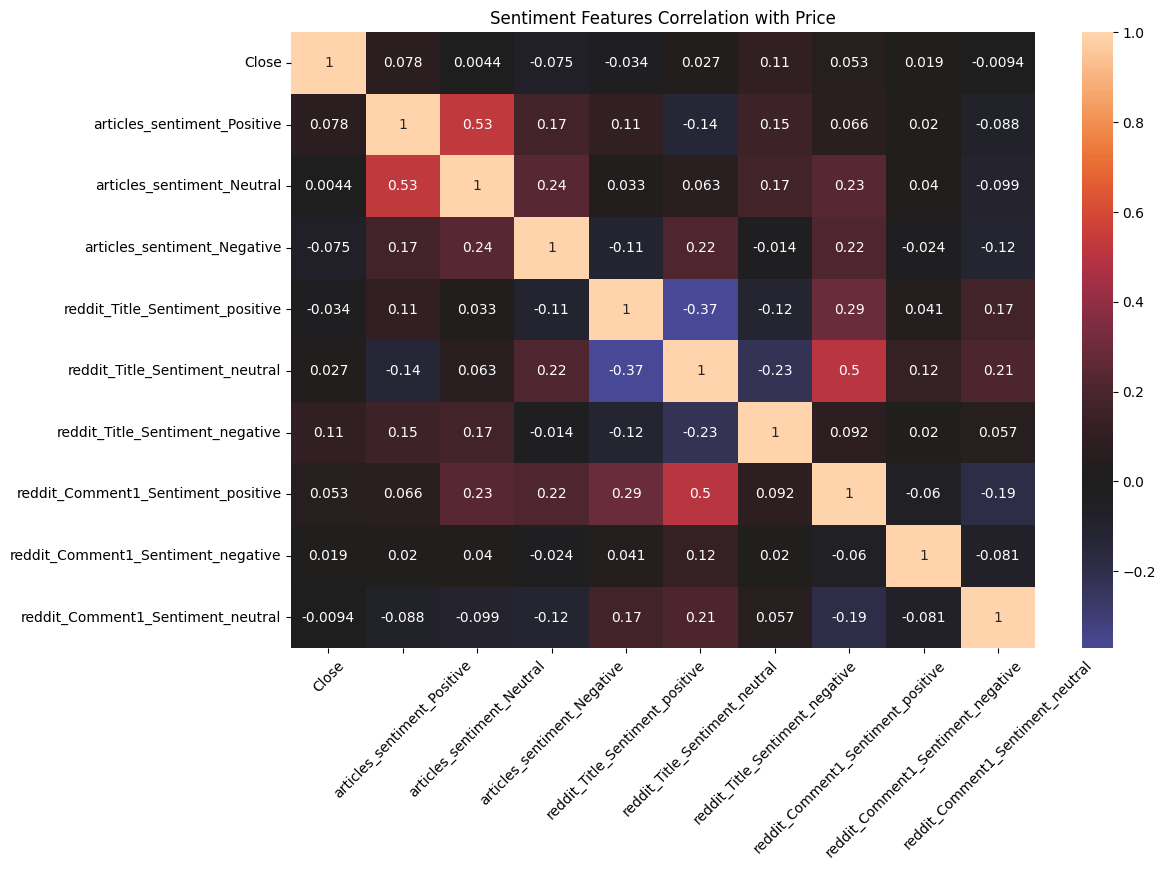

In [23]:
# Sentiment Correlation Heatmap
sentiment_features = [
    'Close',  # Target variable
    'articles_sentiment_Positive',
    'articles_sentiment_Neutral',
    'articles_sentiment_Negative',
    'reddit_Title_Sentiment_positive',
    'reddit_Title_Sentiment_neutral',
    'reddit_Title_Sentiment_negative',
    'reddit_Comment1_Sentiment_positive',
    'reddit_Comment1_Sentiment_negative',
    'reddit_Comment1_Sentiment_neutral',
]

plt.figure(figsize=(12,8))
sns.heatmap(df[sentiment_features].corr(), annot=True, cmap='icefire', center=0)
plt.title("Sentiment Features Correlation with Price")
plt.xticks(rotation=45)
plt.show()


## Distribution

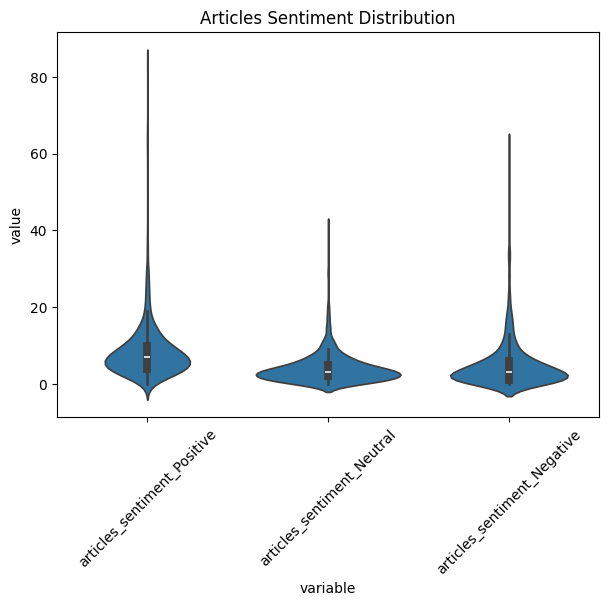

In [24]:
# Sentiment analysis distribution for articles
articles_sentiment = ['articles_sentiment_Positive',
                      'articles_sentiment_Neutral',
                      'articles_sentiment_Negative' ]

# Plot
plt.figure(figsize=(7, 5))
sns.violinplot(data=df[articles_sentiment].melt(), x='variable', y='value')
plt.title('Articles Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()

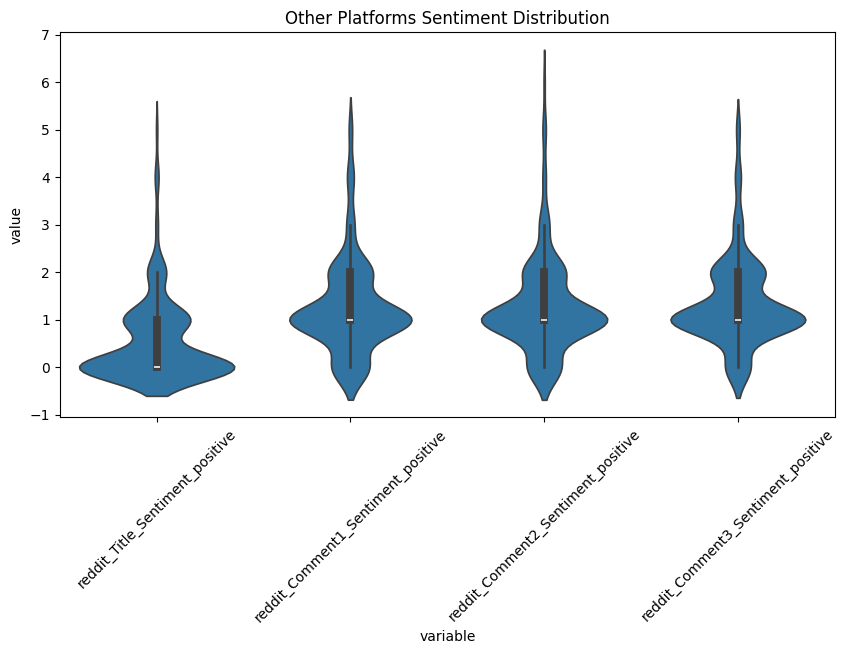

In [25]:
# Sentiment analysis distribution for Reddit
other_sentiments = [
    'reddit_Title_Sentiment_positive',
    'reddit_Comment1_Sentiment_positive',
    'reddit_Comment2_Sentiment_positive',
    'reddit_Comment3_Sentiment_positive'
]
plt.figure(figsize=(10, 5))
sns.violinplot(data=df[other_sentiments].melt(), x='variable', y='value')
plt.title('Other Platforms Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()


## Sentiment lag analysis

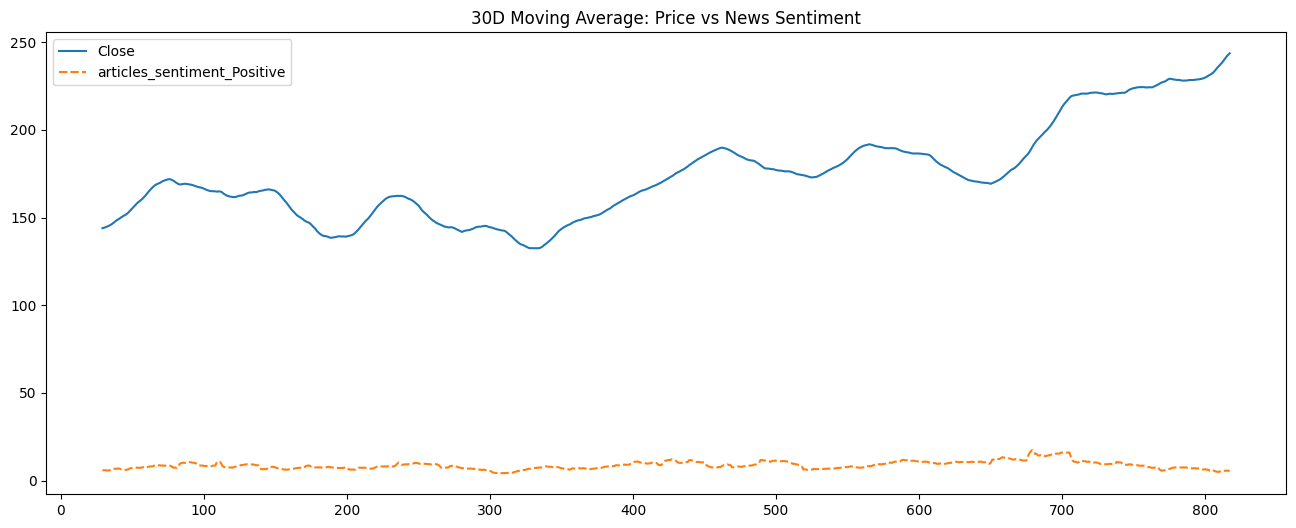

In [26]:
# Sentiment-Price Lag Analysis
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=df[['Close','articles_sentiment_Positive']].rolling(30).mean(),
             ax=ax, legend='auto')
plt.title('30D Moving Average: Price vs News Sentiment')
plt.show()

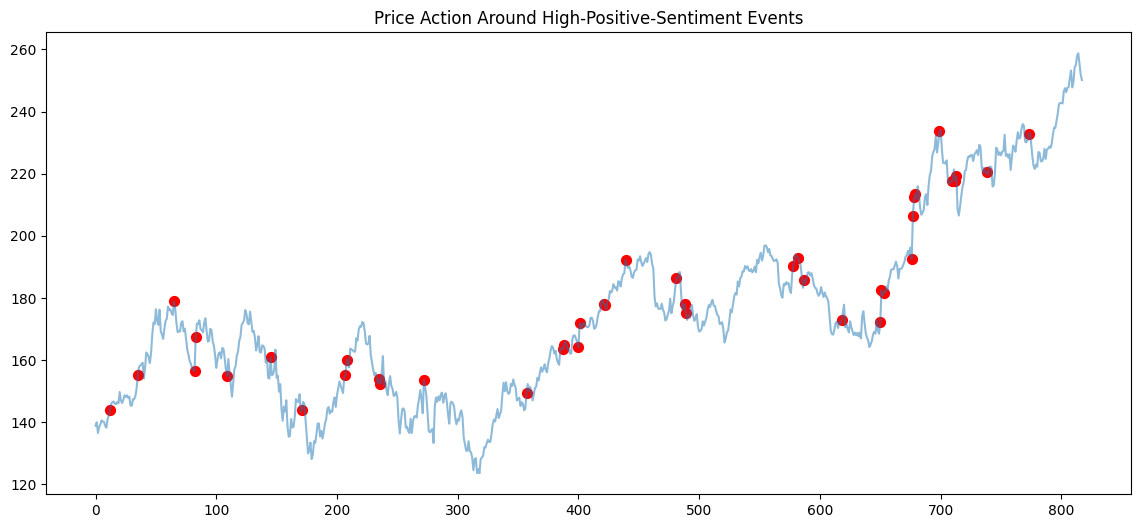

In [27]:
# check to see if positive article sentiment coincided with stock change
event_dates = df[df['articles_sentiment_Positive'] > df['articles_sentiment_Positive'].quantile(0.95)].index

plt.figure(figsize=(14,6))
plt.plot(df['Close'], alpha=0.5)
plt.scatter(event_dates, df.loc[event_dates, 'Close'],
           c='red', s=50)
plt.title('Price Action Around High-Positive-Sentiment Events')
plt.show()


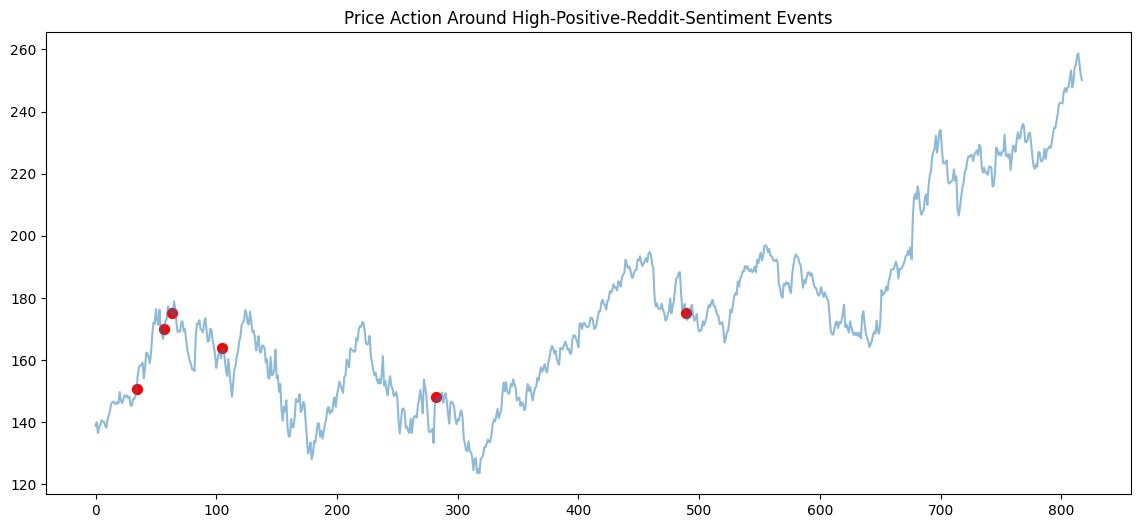

In [28]:
# check to see if positive reddit sentiment coincided with stock change
event_dates = df[df['reddit_Title_Sentiment_positive'] > df['reddit_Title_Sentiment_positive'].quantile(0.95)].index

plt.figure(figsize=(14,6))
plt.plot(df['Close'], alpha=0.5)
plt.scatter(event_dates, df.loc[event_dates, 'Close'],
           c='red', s=50)
plt.title('Price Action Around High-Positive-Reddit-Sentiment Events')
plt.show()


## volatility

In [29]:
from arch import arch_model

returns = df['Close'].pct_change().dropna() * 100
am = arch_model(returns, vol='GARCH', p=1, q=1)
res = am.fit()

plt.figure(figsize=(14,6))
plt.plot(res.conditional_volatility)
plt.title('GARCH Model: Conditional Volatility')
plt.show()


ModuleNotFoundError: No module named 'arch'

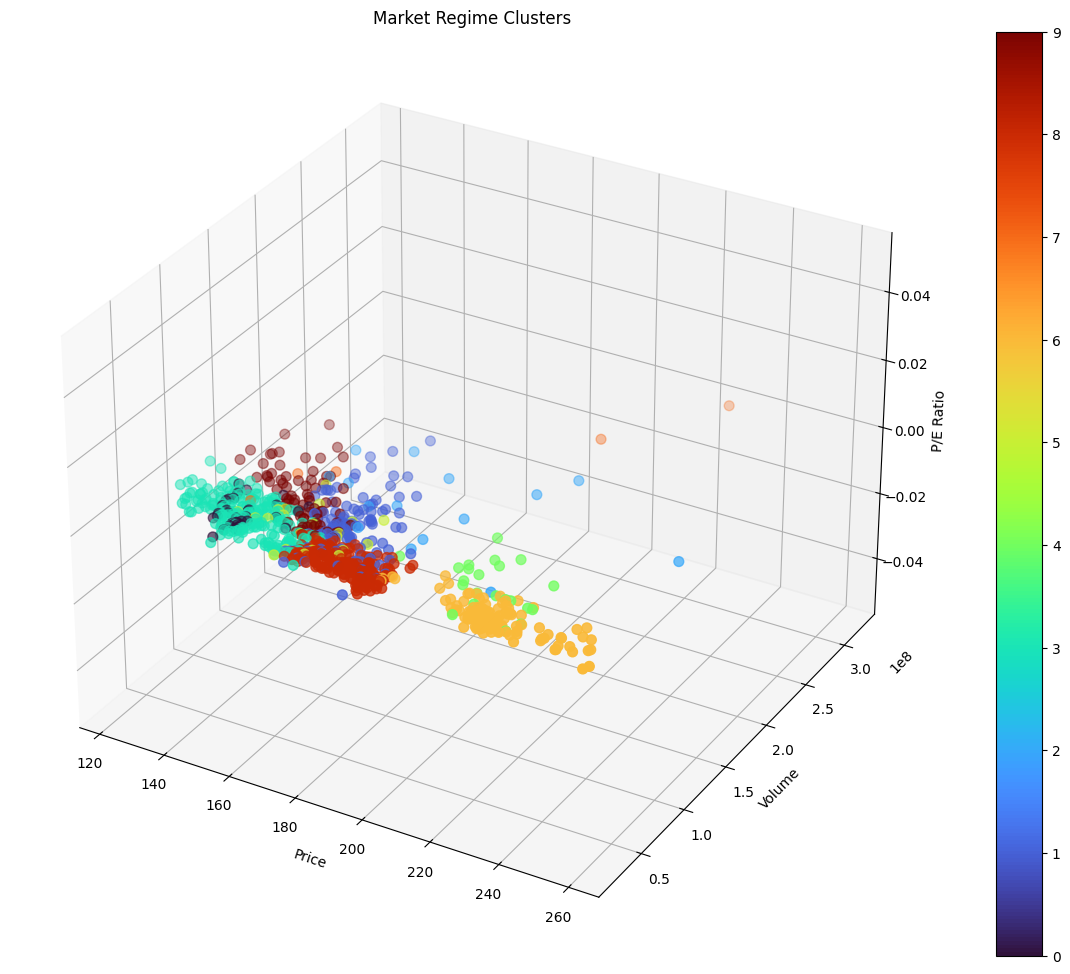

In [30]:
# Market Regime Clustering
from sklearn.preprocessing import RobustScaler
from sklearn.mixture import BayesianGaussianMixture

cluster_features = ['Close', 'Volume',
                   'articles_sentiment_Positive',
                   'Unemployment Rate (%)']

cluster_data = df[cluster_features].dropna()
scaler = RobustScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Bayesian GMM for automatic component selection
bgmm = BayesianGaussianMixture(n_components=10,
                              weight_concentration_prior=0.01)
df['Cluster'] = bgmm.fit_predict(scaled_data)

# 3D Visualization
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(cluster_data['Close'], cluster_data['Volume'],
                 c=df['Cluster'],
                cmap='turbo', s=50)
plt.title('Market Regime Clusters')
ax.set_xlabel('Price')
ax.set_ylabel('Volume')
ax.set_zlabel('P/E Ratio')
plt.colorbar(sc)
plt.show()


## outlier detection

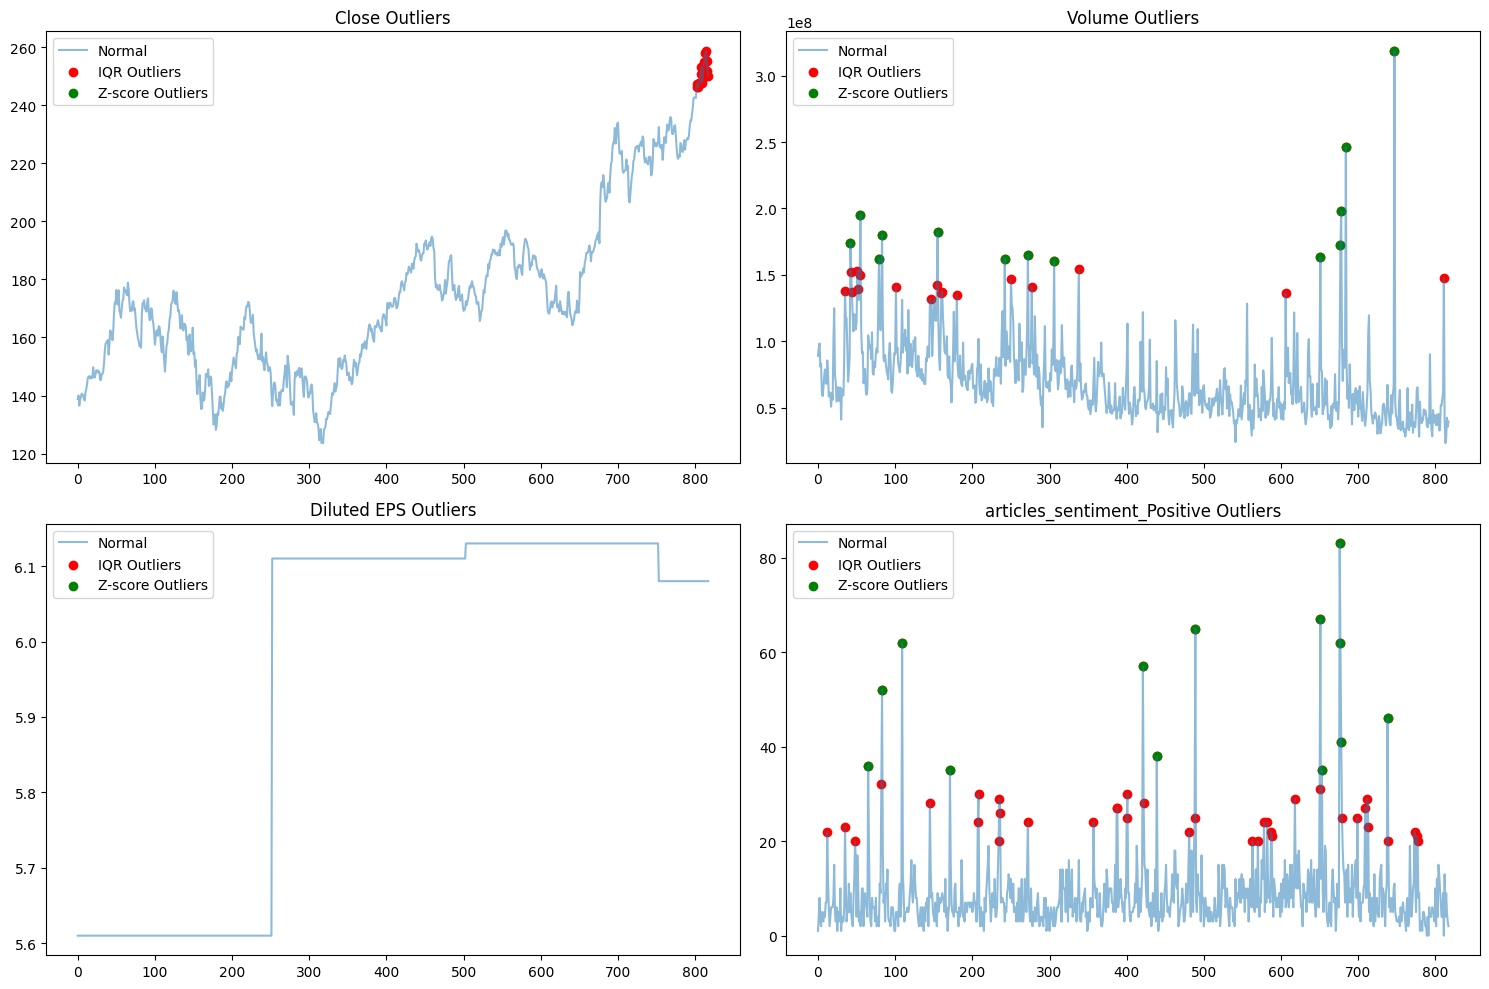

In [31]:
import numpy as np

# Outlier Detection
outlier_features = ['Close', 'Volume', 'Diluted EPS', 'articles_sentiment_Positive']

plt.figure(figsize=(15,10))
for i, col in enumerate(outlier_features, 1):
    plt.subplot(2,2,i)

    # IQR Method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]

    # Z-score Method
    z_scores = np.abs((df[col] - df[col].mean())/df[col].std())
    z_outliers = df[z_scores > 3]

    plt.plot(df[col], alpha=0.5, label='Normal')
    plt.scatter(iqr_outliers.index, iqr_outliers[col], color='red', label='IQR Outliers')
    plt.scatter(z_outliers.index, z_outliers[col], color='green', label='Z-score Outliers')
    plt.title(f'{col} Outliers')
    plt.legend()

plt.tight_layout()
plt.show()


## PCA analysis

In [32]:
# PCA Analysis
from sklearn.decomposition import PCA

pca_features = [
    'Close',
    'GDP (Billions USD)', 'Unemployment Rate (%)',
    'Diluted EPS',
    'articles_sentiment_Positive', 'reddit_Title_Sentiment_positive'
]

pca_data = df[pca_features].dropna()
scaler = StandardScaler()
scaled_pca = scaler.fit_transform(pca_data)

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_pca)

# Variance Explained
plt.figure(figsize=(10,6))
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()


NameError: name 'StandardScaler' is not defined

In [33]:
# Component Loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i}' for i in range(1, pca.n_components_+1)],
                        index=pca_features)

plt.figure(figsize=(12,8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.show()

NameError: name 'pca' is not defined

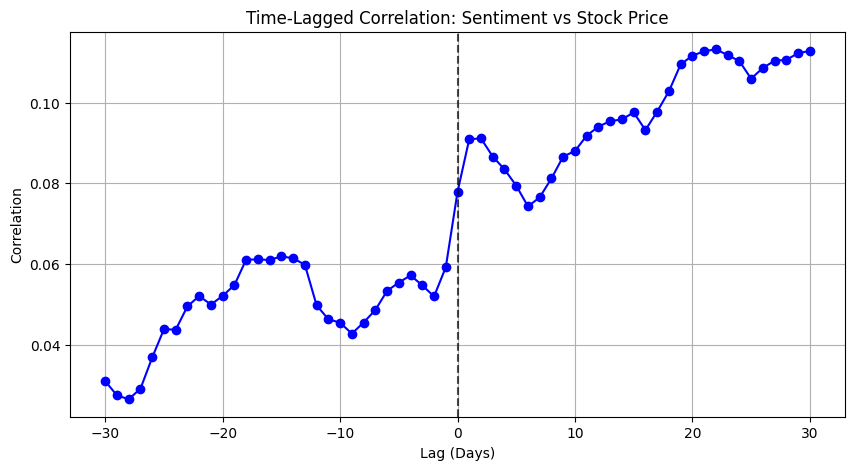

In [35]:
# Define lag range (e.g., -30 to +30 days)
lags = np.arange(-30, 31)

# Compute cross-correlation for each lag
correlations = [df['Close'].corr(df['articles_sentiment_Positive'].shift(lag)) for lag in lags]

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(lags, correlations, marker="o", linestyle="-", color="b")
plt.axvline(0, color='black', linestyle="--", alpha=0.7)
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.title("Time-Lagged Correlation: Sentiment vs Stock Price")
plt.grid(True)
plt.show()

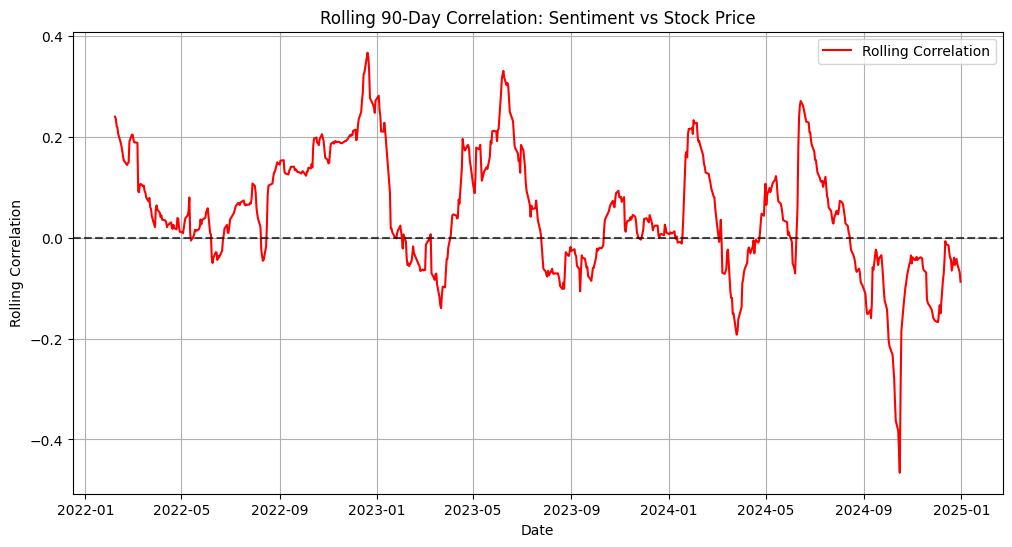

In [36]:
# Define rolling window size (e.g., 90 days)
window_size = 90

# Compute rolling correlation
df['rolling_corr'] = df['Close'].rolling(window_size).corr(df['articles_sentiment_Positive'])

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['rolling_corr'], label="Rolling Correlation", color="red")
plt.axhline(0, color='black', linestyle="--", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Rolling Correlation")
plt.title(f"Rolling {window_size}-Day Correlation: Sentiment vs Stock Price")
plt.legend()
plt.grid(True)
plt.show()


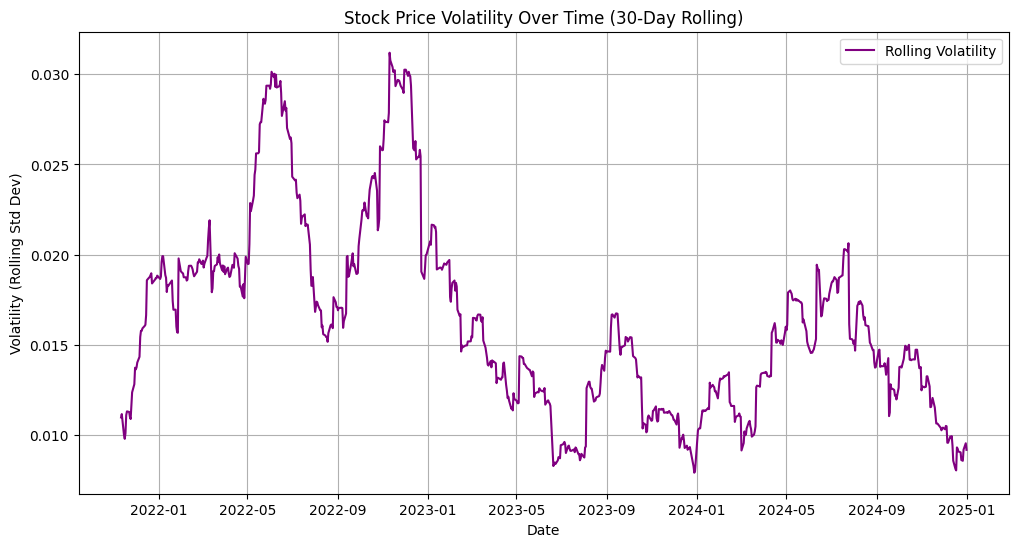

In [37]:
# Define rolling window size (e.g., 30 days)
window_size = 30

# Compute rolling volatility
df['rolling_volatility'] = df['Close'].pct_change().rolling(window_size).std()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['rolling_volatility'], label="Rolling Volatility", color="purple")
plt.xlabel("Date")
plt.ylabel("Volatility (Rolling Std Dev)")
plt.title(f"Stock Price Volatility Over Time ({window_size}-Day Rolling)")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-38-300ce14ce25a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_features.index, x=top_features.values, palette="coolwarm")


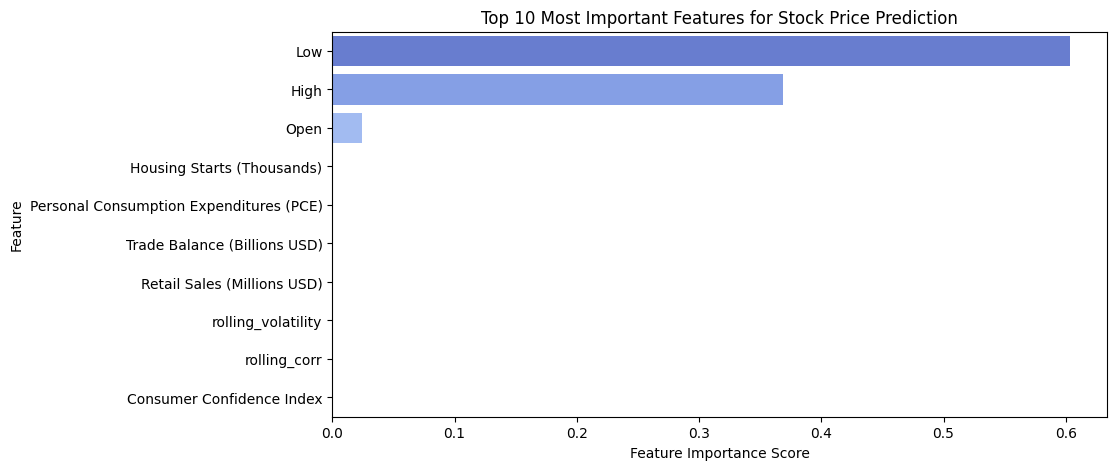

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (excluding 'Date' and target variable)
features = df.drop(columns=['Date', 'Close'])
target = df['Close']

# Fill NaN values
features = features.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Feature Importance Plot
feature_importances = pd.Series(rf.feature_importances_, index=features.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=top_features.index, x=top_features.values, palette="coolwarm")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features for Stock Price Prediction")
plt.show()

# Uses a Random Forest model to rank the most important features influencing stock prices
# Helps determine which macroeconomic indicators, sentiment scores, or financial metrics are the strongest predictors

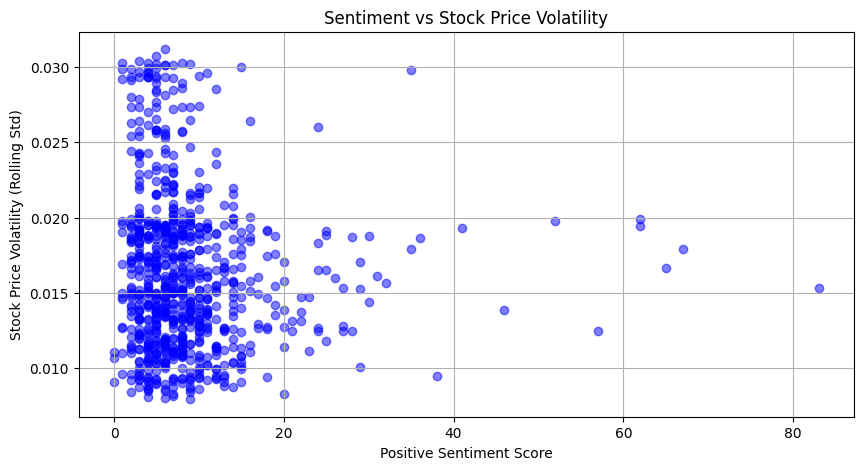

In [39]:
# Scatter plot of sentiment vs volatility
plt.figure(figsize=(10, 5))
plt.scatter(df['articles_sentiment_Positive'], df['rolling_volatility'], alpha=0.5, color="blue")
plt.xlabel("Positive Sentiment Score")
plt.ylabel("Stock Price Volatility (Rolling Std)")
plt.title("Sentiment vs Stock Price Volatility")
plt.grid(True)
plt.show()


# Feature Engineering

# Feature Selection

# Model Development

# Model Evaluation